# ODI Player Performance EDA
This notebook explores cleaned ODI player statistics from `odi_stats_cleaned.csv`. We aim to extract performance insights to guide predictive modeling in future steps.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/processed/odi_stats_cleaned.csv')
df.head()

,Player,Team,Mat,Inns,NO,Runs,Avg,SR,100s,50s,Bowl_Inns,Overs,Wkts,Bowl_Avg,Econ,BBI,4w,5w
0,Virat Kohli,India,302,290,45,14181,57.88,93.61,51,74,53,112.2,5,136.00,6.05,Jan-13,0,0
1,Rohit Sharma,India,262,256,34,10709,49.12,91.97,31,55,43,88.5,9,64.88,6.57,Feb-27,0,0
2,Shubman Gill,India,55,55,8,2775,59.04,104.73,8,15,0,0.0,0,0.00,0.00,0,0,0
3,KL Rahul,India,75,66,11,2624,47.71,88.24,6,17,3,20.0,1,100.00,5.00,01-Mar,0,0
4,Shreyas Iyer,India,60,55,6,2377,48.51,95.69,4,17,0,0.0,0,0.00,0.00,0,0,0


## Dataset Columns Overview

In [3]:
df.columns.tolist()

['Player',
 'Team',
 'Mat',
 'Inns',
 'NO',
 'Runs',
 'Avg',
 'SR',
 '100s',
 '50s',
 'Bowl_Inns',
 'Overs',
 'Wkts',
 'Bowl_Avg',
 'Econ',
 'BBI',
 '4w',
 '5w']

## Summary Statistics

In [4]:
df.describe()

,Mat,Inns,NO,Runs,Avg,SR,100s,50s,Bowl_Inns,Overs,Wkts,Bowl_Avg,Econ,4w,5w
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,68.956835,50.100719,9.366906,1485.784173,27.974892,86.210360,2.654676,8.107914,37.294964,296.769784,48.589928,27.659137,4.163741,0.755396,0.402878
std,54.373890,51.780794,9.060300,2087.741050,13.184409,15.459892,6.106200,11.944128,43.411488,365.168883,62.018909,21.926854,2.712066,1.178563,0.678013
min,5.000000,2.000000,0.000000,6.000000,0.000000,46.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,16.500000,4.000000,147.000000,16.120000,75.350000,0.000000,0.000000,1.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,30.000000,6.000000,773.000000,28.400000,87.130000,0.000000,3.000000,21.000000,138.200000,22.000000,30.350000,5.030000,0.000000,0.000000
75%,92.000000,66.000000,12.000000,1985.500000,37.595000,94.595000,3.000000,11.500000,58.000000,465.200000,74.000000,38.595000,6.015000,1.000000,1.000000
max,302.000000,290.000000,47.000000,14181.000000,59.040000,125.240000,51.000000,74.000000,238.000000,1955.500000,317.000000,136.000000,11.200000,9.000000,4.000000


## Correlation Heatmap

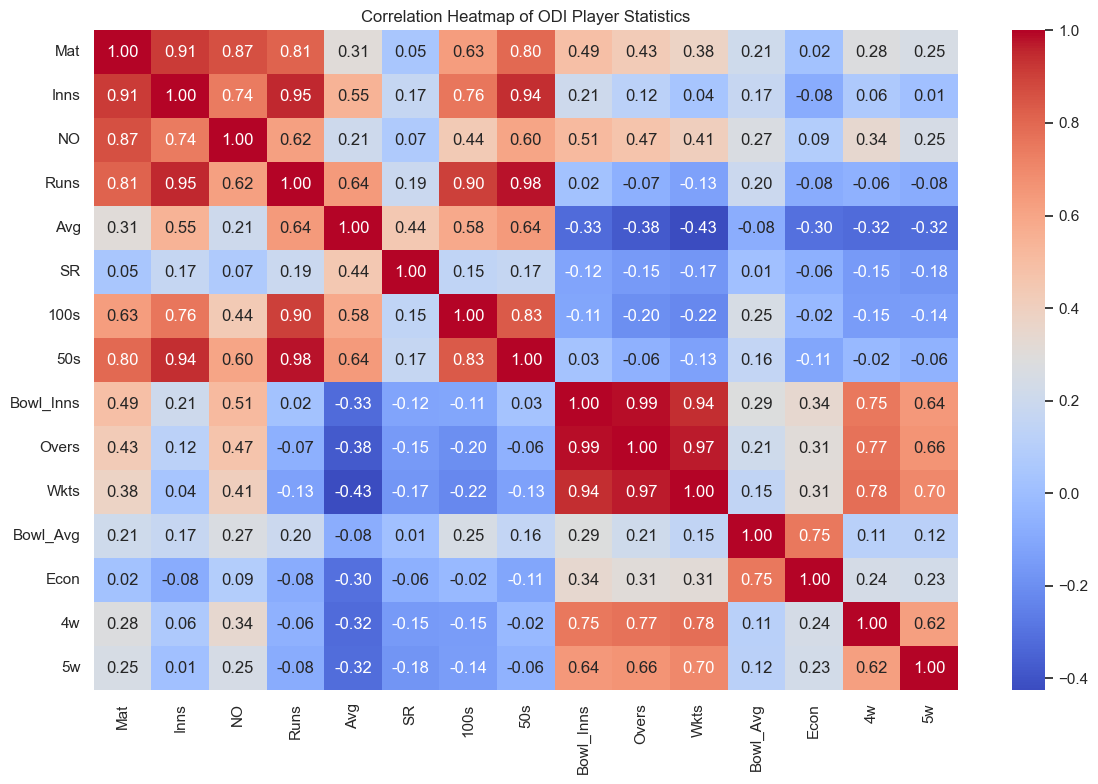

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of ODI Player Statistics')
plt.tight_layout()
plt.show()

**Insight:**
- Strong correlations between `Runs`, `Avg`, and `50s` indicate consistent scoring patterns.
- `Wkts` shows a moderate correlation with `Overs`, expected from bowling volume.
- `Econ` and `Bowl_Avg` correlations can help distinguish defensive vs aggressive bowlers.

## Top 10 ODI Batters by Runs

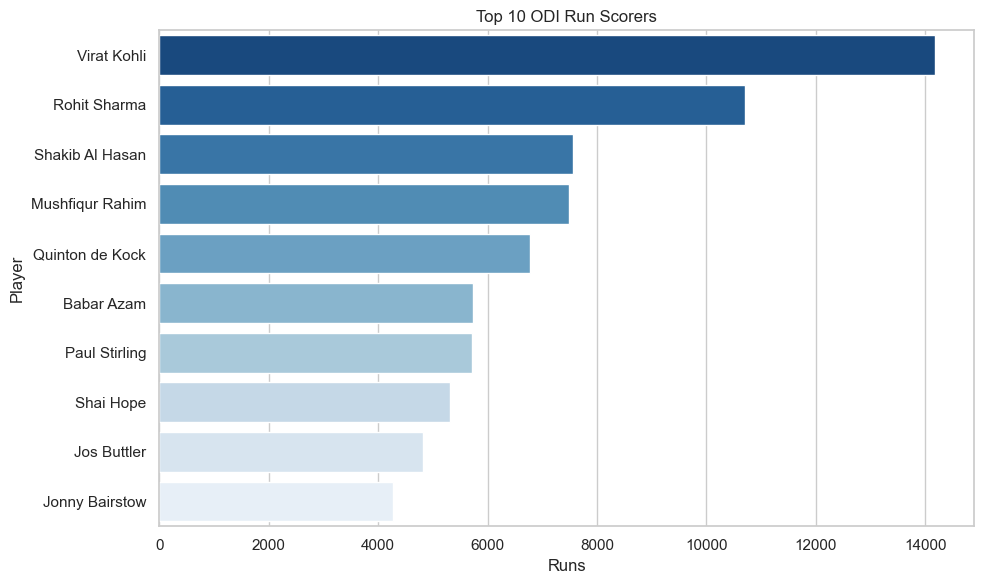

In [6]:
top_batters = df.sort_values(by='Runs', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_batters, x='Runs', y='Player', palette='Blues_r')
plt.title('Top 10 ODI Run Scorers')
plt.tight_layout()
plt.show()

## Top 10 ODI Bowlers by Wickets

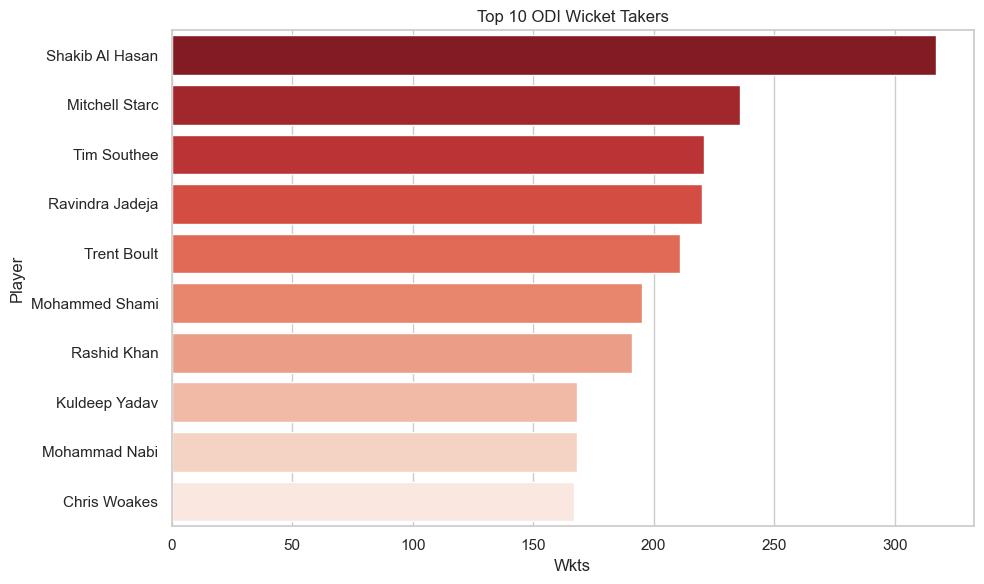

In [7]:
top_bowlers = df.sort_values(by='Wkts', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_bowlers, x='Wkts', y='Player', palette='Reds_r')
plt.title('Top 10 ODI Wicket Takers')
plt.tight_layout()
plt.show()

## Scatter Plot: Strike Rate vs Runs

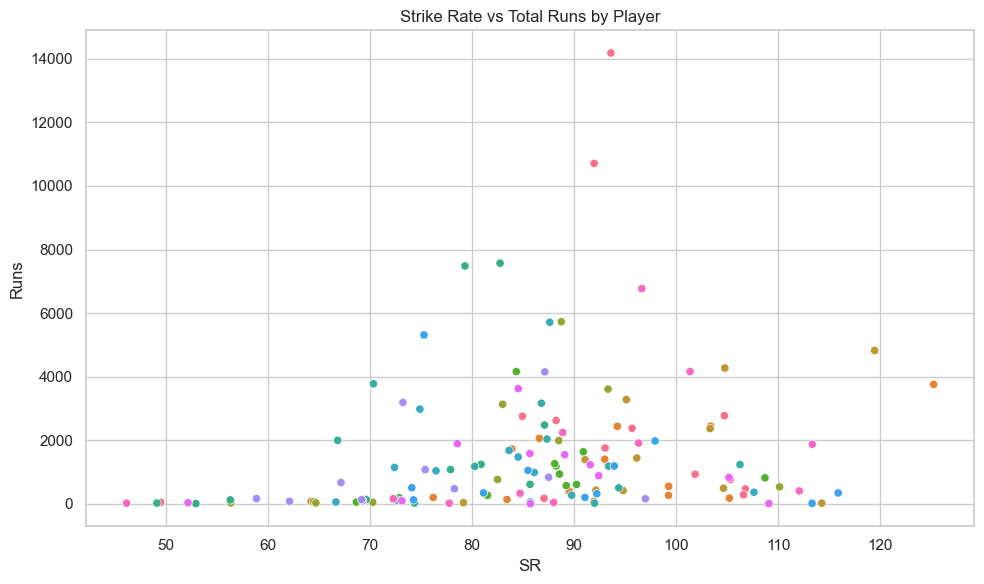

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SR', y='Runs', hue='Team', legend=False)
plt.title('Strike Rate vs Total Runs by Player')
plt.tight_layout()
plt.show()

**Insight:** Players in the top-right quadrant (high SR, high Runs) are key impact players. They are valuable for match predictions and game-changing innings.

## Scatter Plot: Wickets vs Economy

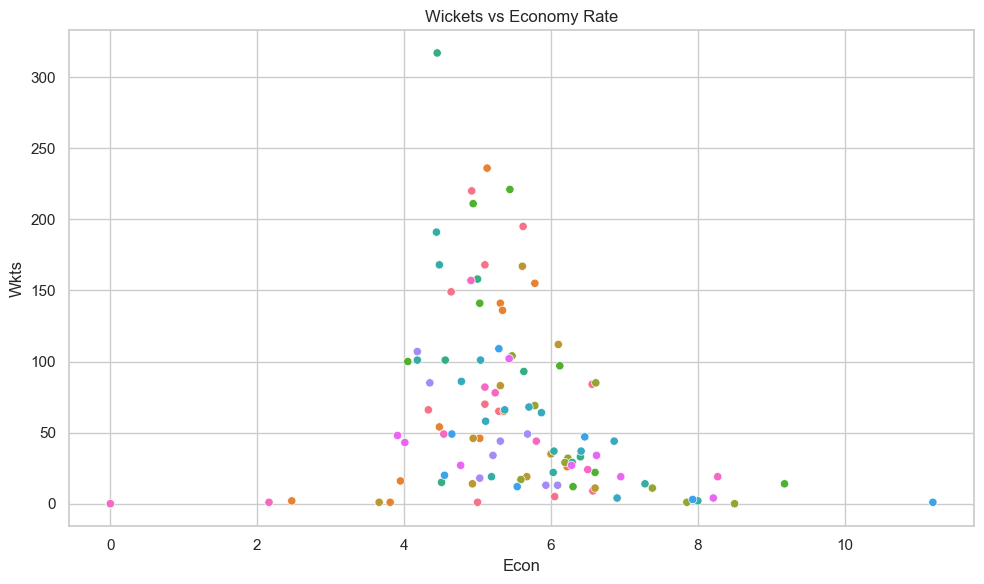

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Econ', y='Wkts', hue='Team', legend=False)
plt.title('Wickets vs Economy Rate')
plt.tight_layout()
plt.show()

**Insight:** Bowlers with low economy and high wickets are the most efficient.
This quadrant helps classify bowlers as defensive (low econ, fewer wickets) or attacking (high wickets, high economy).